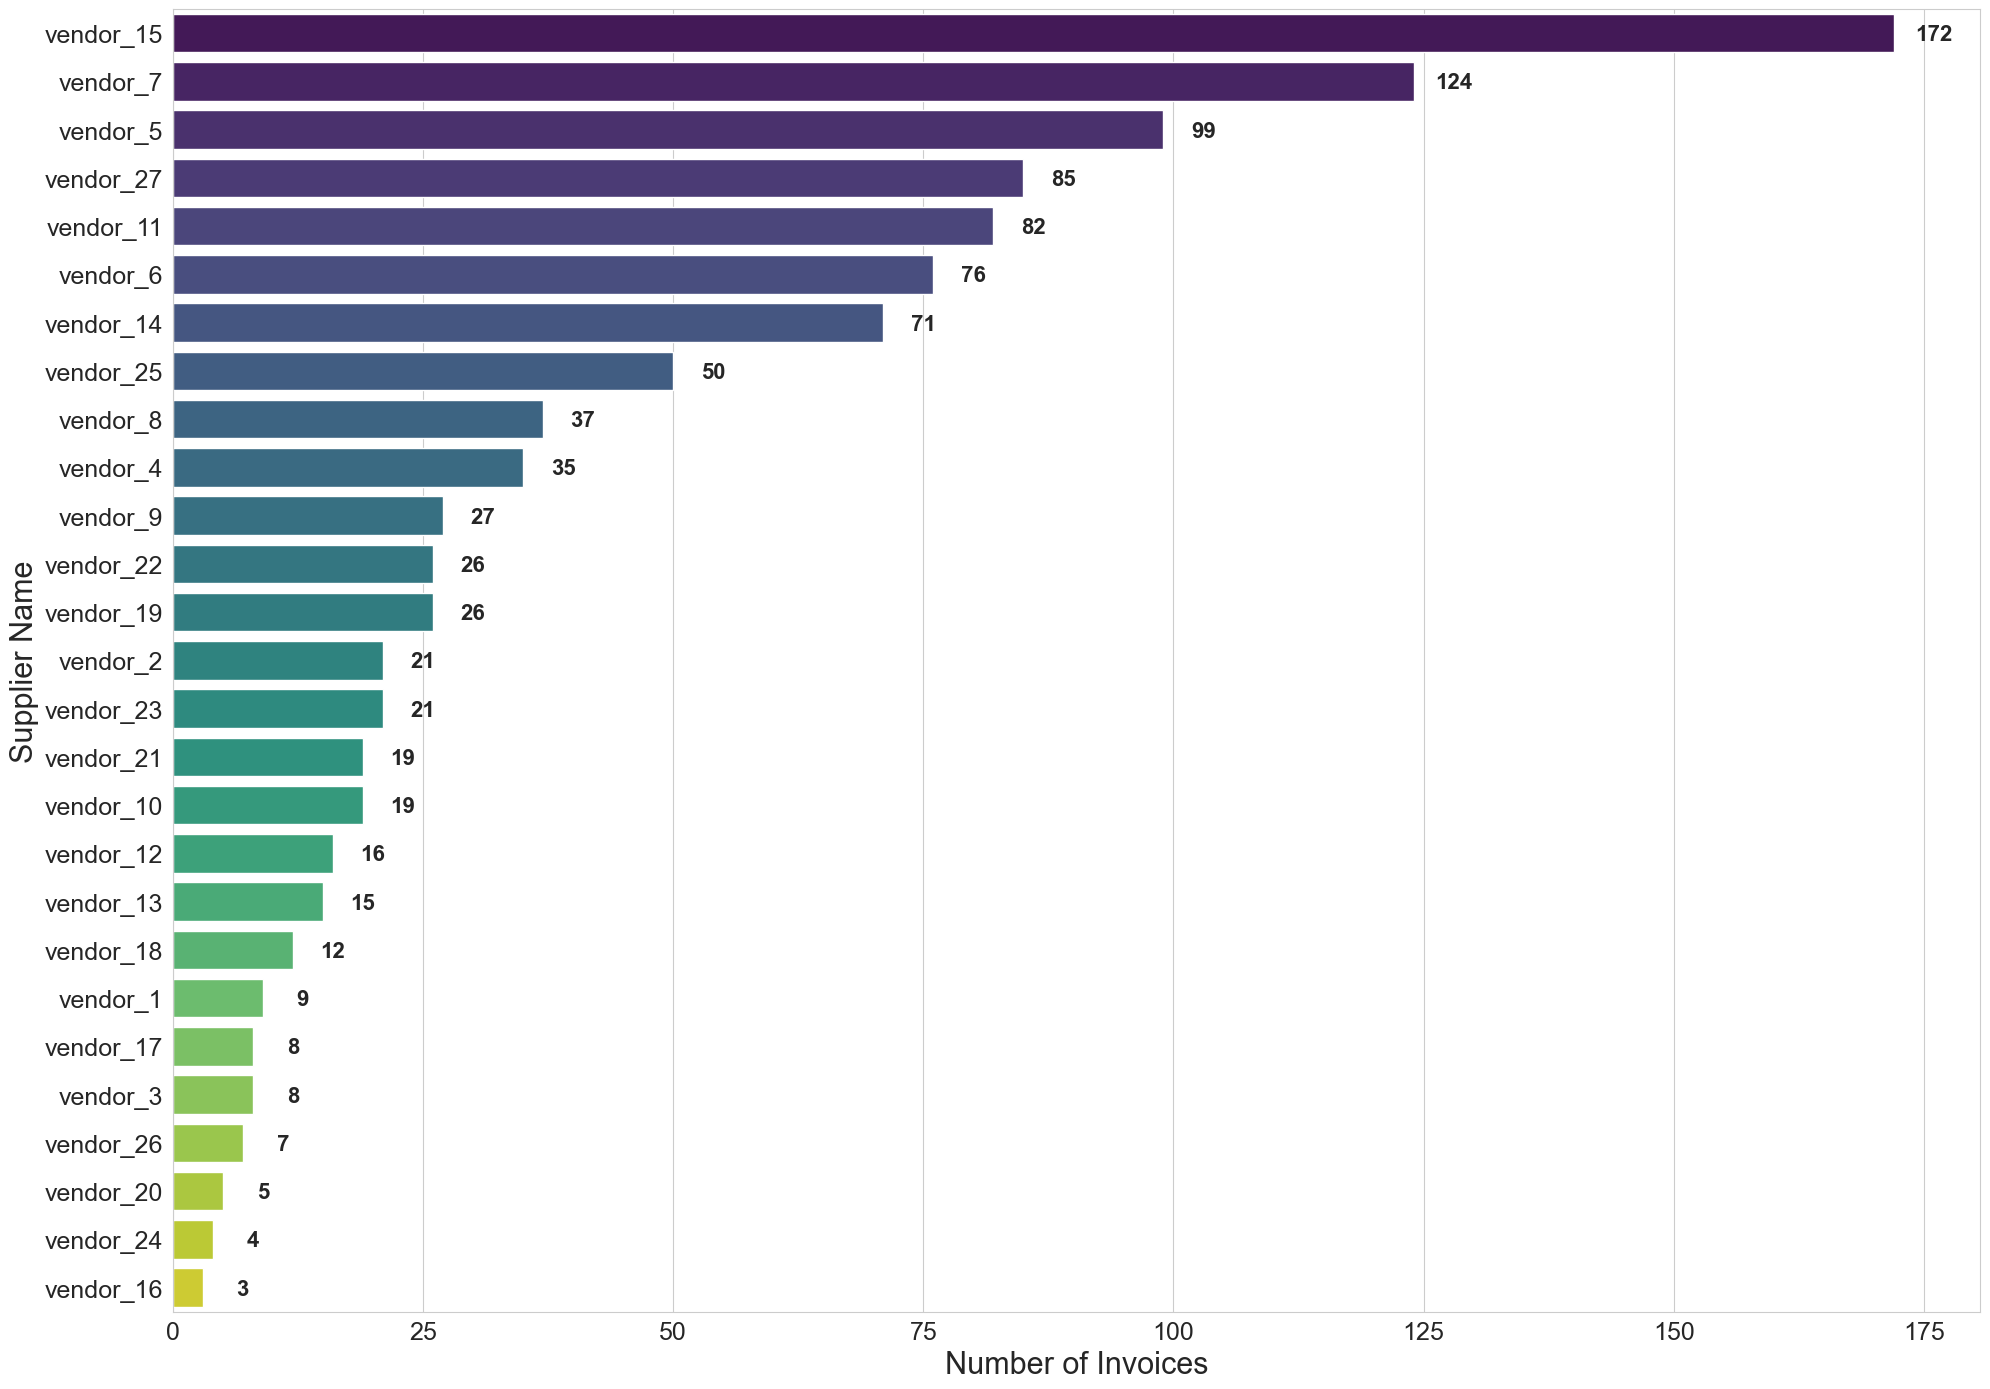

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
invoices_df = pd.read_excel("./xlsx/final_1077inv.xlsx")

# Rename the vendors
unique_vendors = invoices_df['vendor_name'].unique()
vendor_mapping = {vendor: f'vendor_{i+1}' for i, vendor in enumerate(unique_vendors)}
invoices_df['vendor_name'] = invoices_df['vendor_name'].map(vendor_mapping)

# Count the number of invoices for each renamed vendor
vendor_counts = invoices_df['vendor_name'].value_counts()

# Setting up visual aesthetics
sns.set_style("whitegrid")

# Defining the font sizes and other visual parameters
# title_font_size = 20
axis_label_font_size = 22
tick_label_font_size = 18
number_font_size = 16  # size of the number next to bars

# Plotting the Horizontal Bar Chart with the specified adjustments
plt.figure(figsize=(20, 14))
bar_plot = sns.barplot(y=vendor_counts.index, x=vendor_counts.values, palette="viridis", orient="h") # viridis
# plt.title("Number of Invoices per Vendor", fontsize=title_font_size)
plt.ylabel("Supplier Name", fontsize=axis_label_font_size)
plt.xlabel("Number of Invoices", fontsize=axis_label_font_size)
plt.yticks(fontsize=tick_label_font_size)
plt.xticks(fontsize=tick_label_font_size)

# Adding the number of instances next to each bar
for p in bar_plot.patches:
    width = p.get_width()
    plt.text(width + 4, p.get_y() + p.get_height()/2. + 0.02, '{:1.0f}'.format(width), 
             ha="center", va="center", fontsize=number_font_size, fontweight='bold')

plt.tight_layout()

# Save the image to the "images" folder
plt.savefig("images/vendor_invoice_counts_for_presentation.pdf", bbox_inches='tight')
plt.show()

# Save the vendor_counts to a CSV file in the "csv" folder
vendor_counts.to_csv("csv/vendor_invoice_counts_with_renaming.csv", header=["Number of Invoices"])

In [8]:
# Load data from both sheets
sheet1_data = pd.read_excel("./xlsx/final_1077inv.xlsx", sheet_name=0)
sheet2_data = pd.read_excel("./xlsx/final_1077inv.xlsx", sheet_name=1)

# Calculate the number of missing entries for each sheet
missing_data_sheet1 = sheet1_data.isnull().sum()
missing_data_sheet2 = sheet2_data.isnull().sum()

# Convert to DataFrame for better display and merging
missing_data_df = pd.DataFrame({
    'Field Name': missing_data_sheet1.index, 
    'First page': missing_data_sheet1.values, 
    'All pages': missing_data_sheet2.values
})

# Drop the rows for 'Unnamed: 0' and 'vendor_name' and 'file_name'
missing_data_df = missing_data_df[~missing_data_df['Field Name'].isin(['Unnamed: 0', 'vendor_name', 'file_name'])]

# Save the DataFrame to an Excel file
output_path = "./xlsx/missing_data_report.xlsx"
missing_data_df.to_excel(output_path, index=False)

print(f"Missing data report saved to {output_path}")

# Display the DataFrame
display(missing_data_df)

Missing data report saved to ./xlsx/missing_data_report.xlsx


,Field Name,First page,All pages
2,invoice_date,22,1
3,invoice_number,66,6
4,total_amount,46,1
5,charge_period_start_date,137,43
6,charge_period_end_date,135,43
7,mpan,569,51
8,account_number,3,1
